<a href="https://colab.research.google.com/github/elina007/LR1/blob/master/LR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 0. У каждой ячеки ниже будет номер для соответствия пояснений в учебном пособии.

In [0]:
# 1. Подключение нужных для работы моделей
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

In [40]:
# 2. Получение и чтение файла из облака
url = "https://drive.google.com/uc?export=download&id=1VRICeFtVx9dwuTSIDTlVSQzRqQjQVHZU"
input_df = pd.read_csv(url, sep = ';', header=None) 
# вывод заголовка таблицы и первых пяти строк (сэмплов)
input_df.head()

,0
0,39.09334
1,37.99574
2,39.50392
3,40.75022
4,37.31230


In [24]:
# 3. Просмотр последних строк таблицы
input_df.tail(5)

,0
995,31.49616
996,29.37969
997,32.28567
998,30.78766
999,31.53321


In [25]:
# 4. Получение базовых статистических показателей
input_df.describe()

,0
count,1000.000000
mean,36.012624
std,2.897894
min,29.086160
25%,33.877850
50%,36.030460
75%,38.123978
max,42.875800


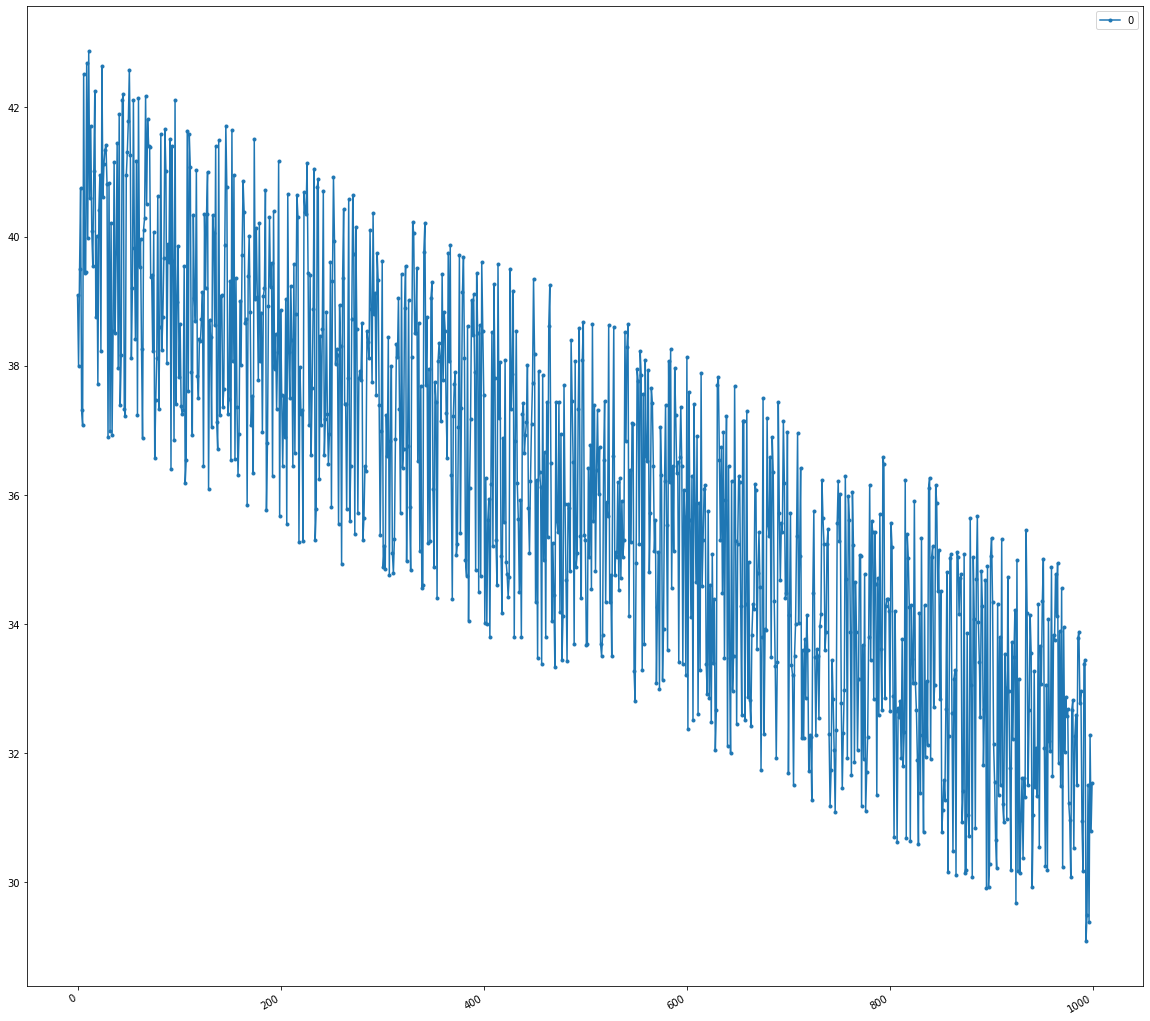

In [26]:
# 5. Можно сразу построить графики
axes = input_df.plot(marker='.', figsize=(20, 20), subplots = True)

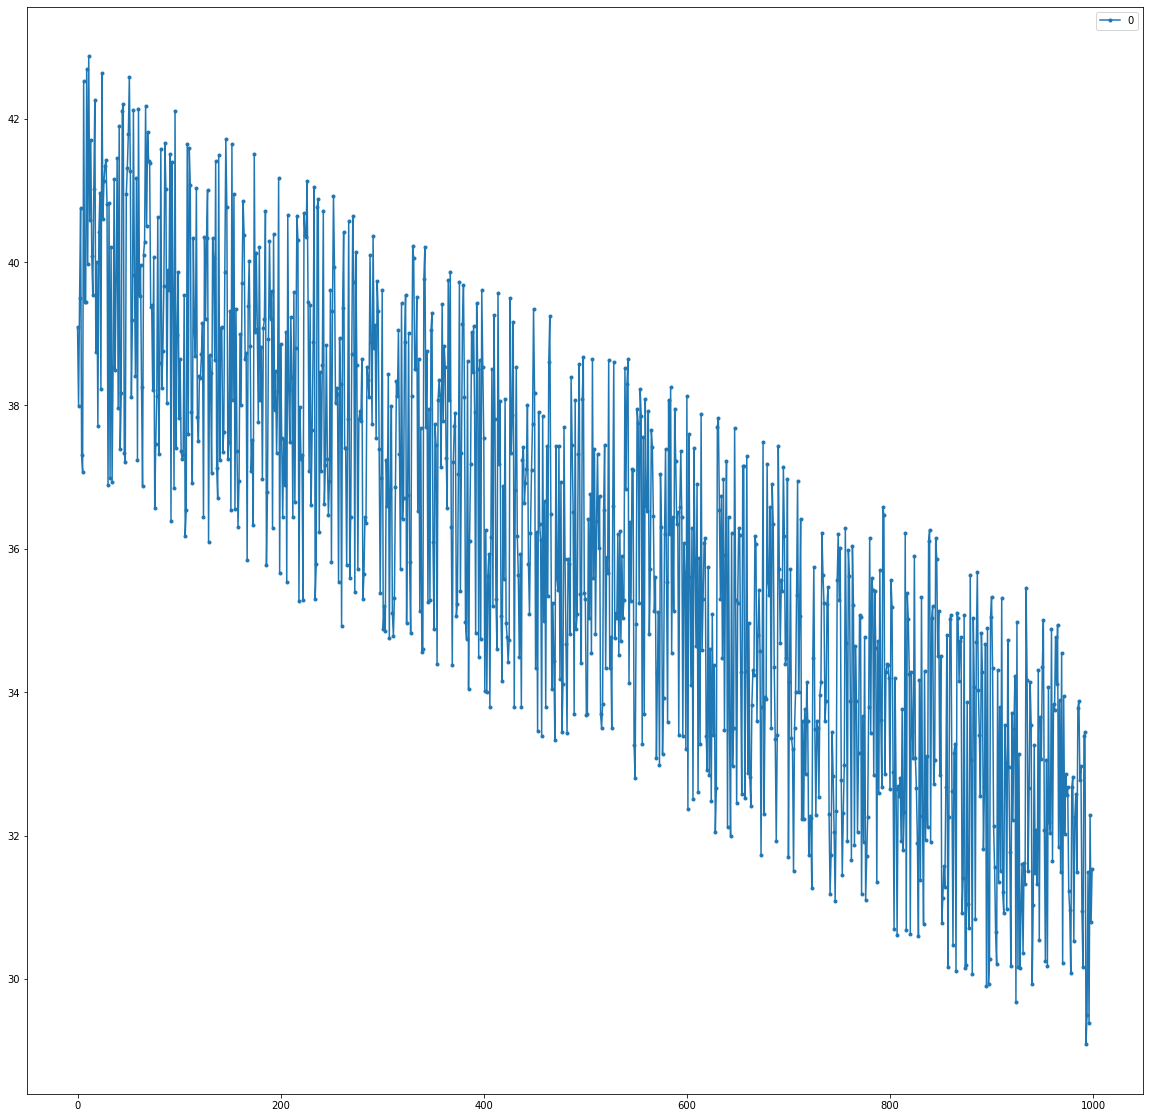

In [28]:
# 6. Можно построить все вместе, заодно удалив индекс строк, так как его график не несет информации.
# input_df[input_df.columns[ 0 : ]] - означает что нужно взять из исходной таблицы только столбцы с 1-го и до последнего. 
# так как в Python индексация с нуля - то нулевой столбец с индексами не будет использован
axes = input_df[input_df.columns[ 0 : ]].plot(marker='.', figsize=(20, 20), subplots = False)

In [30]:
# 7. Подробнее работа с табличными данными pandas будет в следующей работе. Сейчас нужно перевести все в матрицу
# Здесь в дело вступает другая очень популярная и мощная python-библиотека - NumPy

input_matrix = input_df.values # перевод таблицы в матрицу

print('размерность матрицы', input_matrix.shape)
print()

# можно посчитать среднее, минимальное, максимальное и прочие показатели

# цикл от 1 до числа столбцов
for i in range(0, len(input_df.columns)):
  # функция print выводит строку на экран
  # функция формат применяется к шаблону строки для подстановки в него нужных данных в нужном формате
  # запись input_matrix[: , i] означает что нужно взять все строки и i-й столбец из матрицы
  print("{: <12} mean = {:.2f}".format(input_df.columns[i], input_matrix[: , i].mean()))

размерность матрицы (1000, 1)

0            mean = 36.01


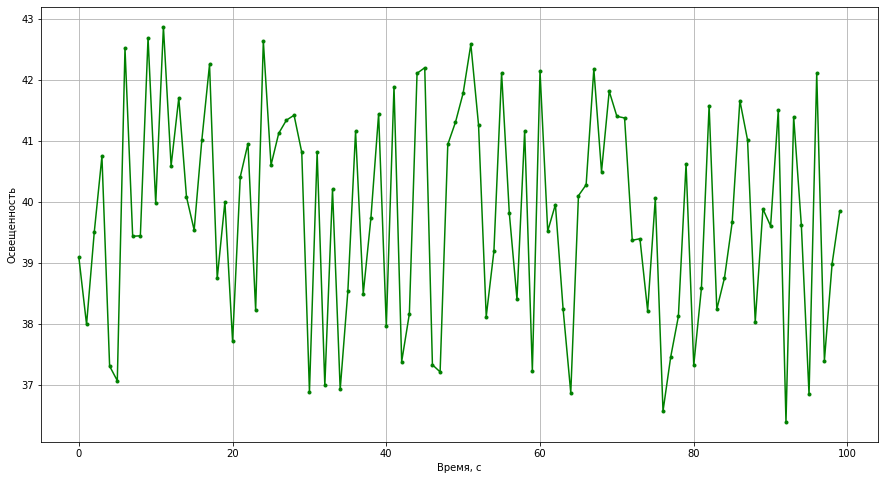

In [37]:
# 8. Теперь можно легко выбрать, какие данные отобразить на графике

# вначале создать объект для рисования на нем
fig, ax = plt.subplots(1, 1, figsize = (15, 8))

# указать какие данные вывести, например, от 100-й до 500 строки
# таймстампы можно для наглядности сгенерировать от нуля с шагом 15 минут
timestamps = range(0, input_matrix.shape[0] * 1, 1)

# зададим диапазон
begin = 0
end   = 100 

# легко указывать цвета, стиль линий, размеры и тип маркера
ax.plot(timestamps[begin : end], input_matrix[begin : end, 0], 'green', marker = '.')

ax.set_xlabel('Время, c') 
ax.set_ylabel('Освещенность')

plt.grid(True)
plt.show()

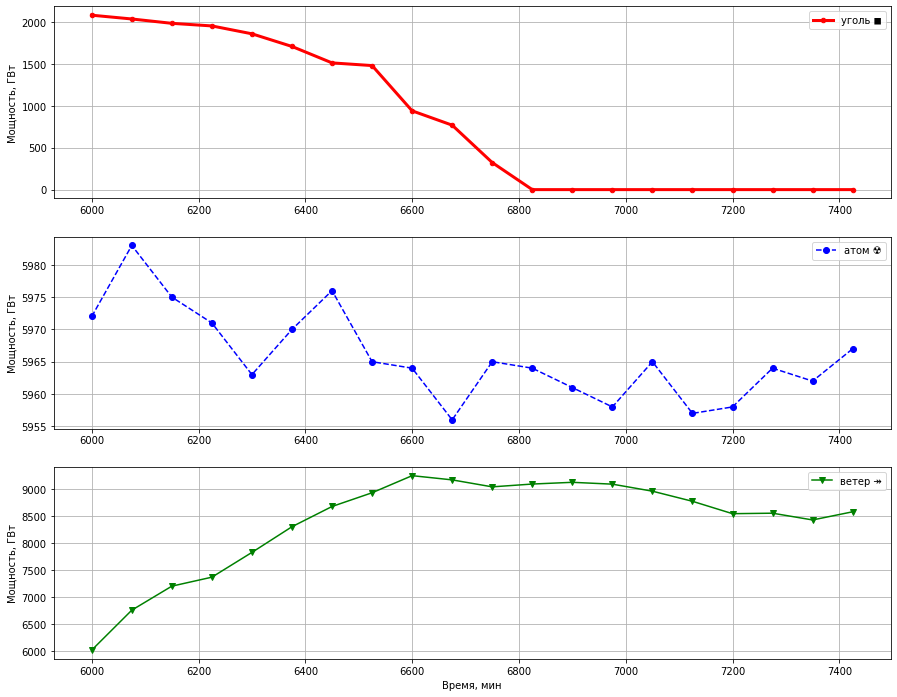

In [0]:
# 9. То же самое, но лишь каждая пятая точка и все графики на отдельных плотах

# вначале создать объект для рисования на нем
fig, ax = plt.subplots(3, 1, figsize = (15, 12))

# указать какие данные вывести, например, от 100-й до 500 ст
# таймстампы можно для наглядности сгенерировать от нуля с шагом 15 минут
timestamps = range(0, input_matrix.shape[0] * 15, 15)

# зададим диапазон
begin = 400
end   = 500 
step = 5

# легко указывать цвета, стиль линий, размеры и тип маркера
ax[0].plot(timestamps[begin : end : step], input_matrix[begin : end : step, 3], 'red', marker = '.', linewidth = 3, markersize = 9)
ax[1].plot(timestamps[begin : end : step], input_matrix[begin : end : step, 4], 'blue', linestyle = '--', marker = 'o')
ax[2].plot(timestamps[begin : end : step], input_matrix[begin : end : step, 6], 'green', marker = 'v')

legend = ['уголь ◼', 'атом ☢', 'ветер ↠']

# примеры "синтаксического сахара" Python (спросите пояснение у преподавателя)
for _ in zip(ax, legend):
  _[0].set_ylabel('Мощность, ГВт')
  _[0].legend([_[1]])
  _[0].grid(True)

# нет необходимости подписывать ось ординат у всех плотов, достаточно у последнего (последний - это -1) 
ax[-1].set_xlabel('Время, мин')

plt.show()

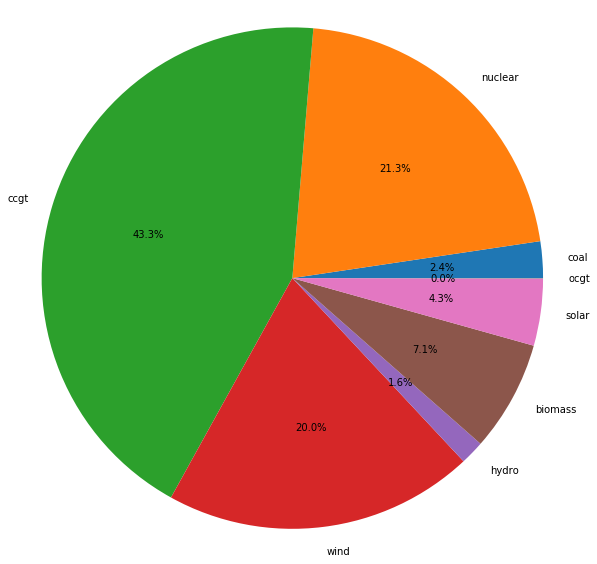

In [0]:
# 10. Другой пример графика - PieChart

# получить сумму значений по столбцам, отвечающим за разные виды генерации (превые три столбца - это индекс, потребление, частота, а последний - обмен с другой системой).
generation_sum = (input_matrix[: , 3 : -1]).sum(axis = 0)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = input_df.columns[3 : -1]

fig1, ax1 = plt.subplots(figsize = (10, 10))
ax1.pie(generation_sum, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()